### Importação dos dados



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [44]:
import pandas as pd

Analise

/tmp/ipython-input-3918123926.py:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3918123926.py:75: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3918123926.py:75: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


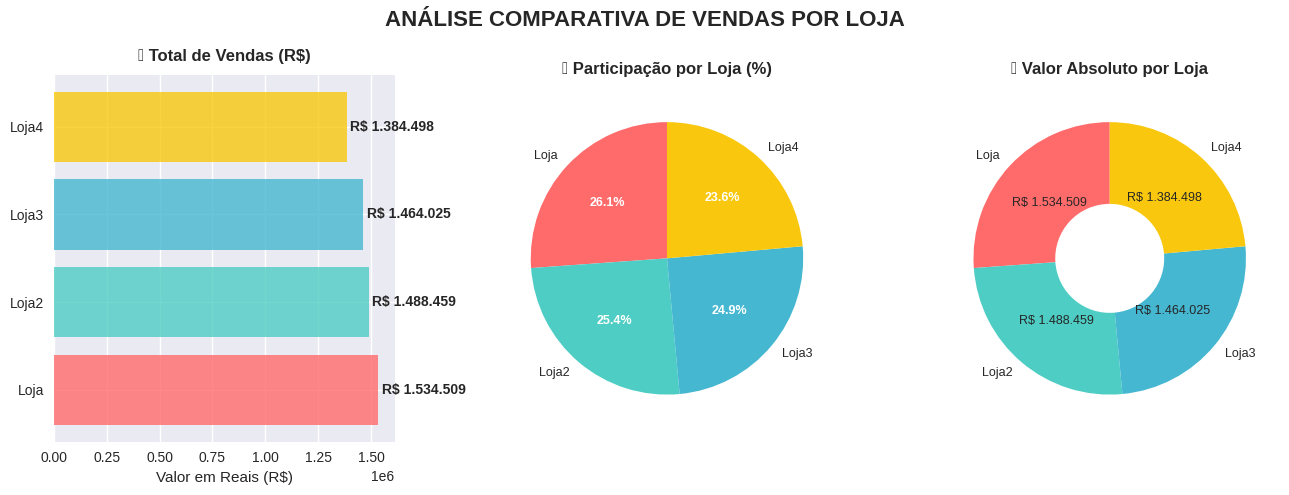

In [45]:
import matplotlib.pyplot as plt
import numpy as np

#
bases = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4
}

resultados = []
for nome_loja, df in bases.items():
    try:
        df['Preço'] = pd.to_numeric(df['Preço'].astype(str).str.replace(',', '.'), errors='coerce')
        resultados.append({
            "Loja": nome_loja,
            "Total Vendido (R$)": df['Preço'].sum(),
            "Média por Venda (R$)": df['Preço'].mean(),
            "Qtde de Vendas": df['Preço'].count()
        })
    except KeyError:
        print(f"Erro: Coluna 'Preço' não encontrada na base {nome_loja}")

resultado_final = pd.DataFrame(resultados)
resultado_final['Total Gráfico'] = resultado_final['Total Vendido (R$)']

#
plt.style.use('seaborn-v0_8')
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']

# FIGURA COM 3 SUBPLOTS (1300x500px)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
fig.suptitle('ANÁLISE COMPARATIVA DE VENDAS POR LOJA', fontsize=16, fontweight='bold', y=0.98)

# --- GRÁFICO 1: BARRAS HORIZONTAIS ---
bars = ax1.barh(resultado_final['Loja'], resultado_final['Total Gráfico'], color=cores, alpha=0.8)
ax1.set_title('📊 Total de Vendas (R$)', fontsize=12, fontweight='bold', pad=10)
ax1.set_xlabel('Valor em Reais (R$)')
ax1.tick_params(axis='y')

# Adiciona valores nas barras
for bar in bars:
    width = bar.get_width()
    ax1.text(width + max(resultado_final['Total Gráfico'])*0.01,
             bar.get_y() + bar.get_height()/2,
             f'R$ {width:,.0f}'.replace(',', '.'),
             ha='left', va='center', fontweight='bold')

# --- GRÁFICO 2: PIZZA (PROPORÇÃO) ---
wedges, texts, autotexts = ax2.pie(resultado_final['Total Gráfico'],
                                  labels=resultado_final['Loja'],
                                  colors=cores,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 9})
ax2.set_title('🥧 Participação por Loja (%)', fontsize=12, fontweight='bold', pad=10)

# Melhora a legibilidade
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# --- GRÁFICO 3: ROSCA (DOUGHNUT) ---
wedges, texts, autotexts = ax3.pie(resultado_final['Total Gráfico'],
                                  labels=resultado_final['Loja'],
                                  colors=cores,
                                  autopct=lambda p: f'R$ {p * sum(resultado_final["Total Gráfico"])/100:,.0f}'.replace(',', '.'),
                                  startangle=90,
                                  wedgeprops={'width': 0.6},
                                  textprops={'fontsize': 9})
ax3.set_title('🍩 Valor Absoluto por Loja', fontsize=12, fontweight='bold', pad=10)

# Ajustes finais
plt.tight_layout()
plt.subplots_adjust(top=0.85, wspace=0.3)
plt.show()

# --- BÔNUS: GRÁFICO DE LINHAS PARA TENDÊNCIA (se tiver dados temporais) ---
# Se seus dados tiverem coluna de data, descomente:
# resultado_final.plot(x='Loja', y='Total Gráfico', marker='o', linestyle='-', linewidth=2, markersize=8)
# plt.title('Tendência de Vendas por Loja')
# plt.ylabel('Total de Vendas (R$)')
# plt.xticks(rotation=45)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# 2. Vendas por Categoria


In [56]:
# Lista com todas as DataFrames de lojas
todas_as_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja", "Loja2", "Loja3", "Loja4"]

# Calcula para cada loja e armazena resultados
resultados = []
for df, nome in zip(todas_as_lojas, nomes_lojas):
    contagem = df['Categoria do Produto'].value_counts().reset_index()
    contagem.columns = ['Categoria', 'Quantidade']
    contagem['Loja'] = nome  # Adiciona coluna com nome da loja
    resultados.append(contagem)

# Combina todos os resultados em um único DataFrame
resultado_final = pd.concat(resultados, ignore_index=True)

# Formata a saída
print("RESUMO GERAL:")
print(resultado_final.pivot(index='Categoria', columns='Loja', values='Quantidade').fillna(0))

RESUMO GERAL:
Loja                   Loja  Loja2  Loja3  Loja4
Categoria                                       
brinquedos              338    313    315    338
eletrodomesticos        254    305    278    254
eletronicos             451    422    451    451
esporte e lazer         277    275    277    277
instrumentos musicais   170    224    177    170
livros                  187    197    185    187
moveis                  480    442    499    480
utilidades domesticas   201    181    177    201


/tmp/ipython-input-2960281332.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2960281332.py:59: UserWarning: Glyph 129374 (\N{PANCAKES}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2960281332.py:59: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129374 (\N{PANCAKES}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


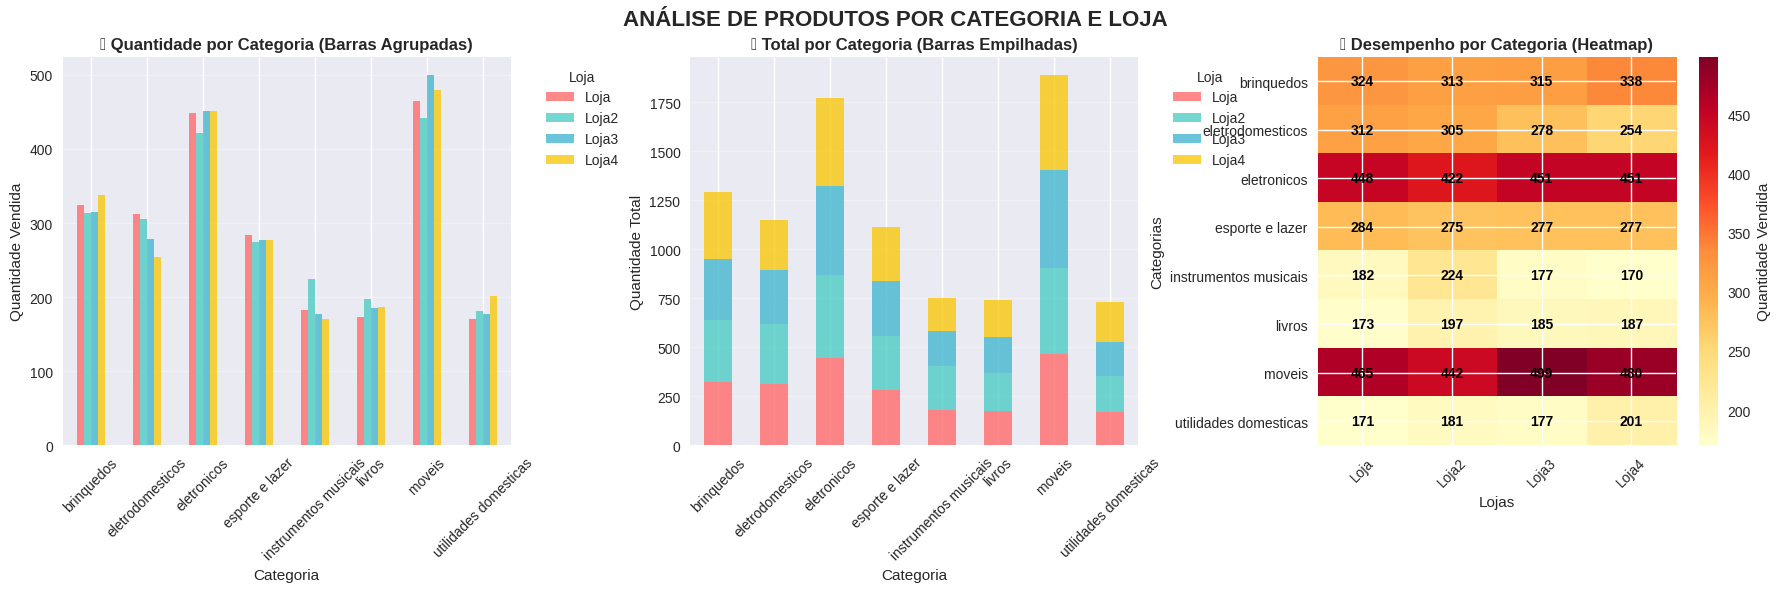

/tmp/ipython-input-2960281332.py:76: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


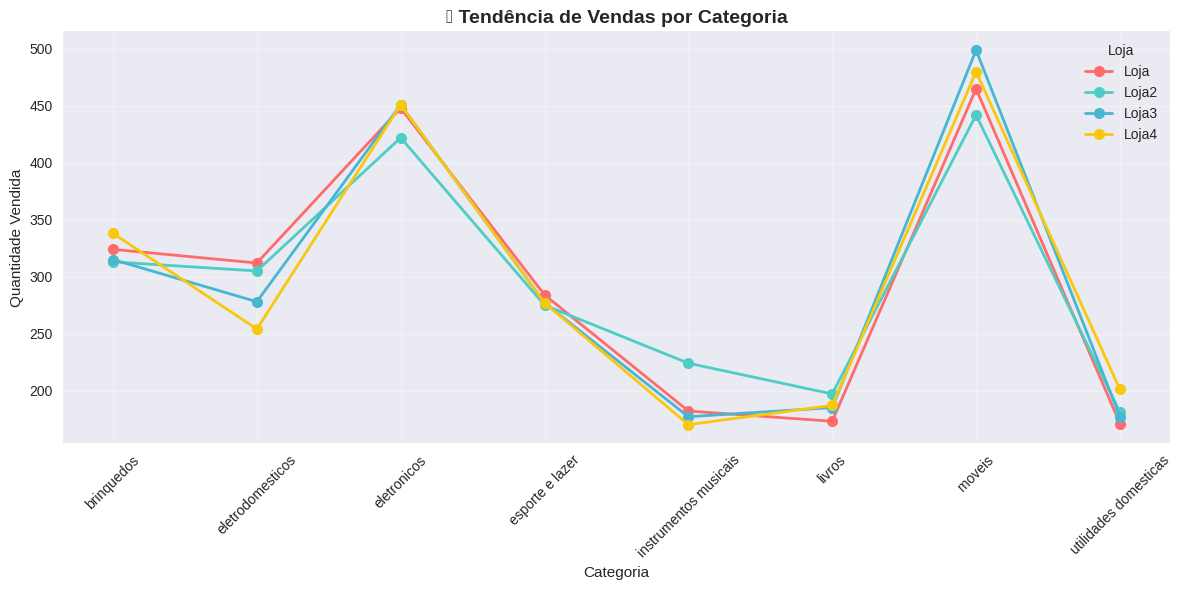

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#
#

# Criar pivot table para os gráficos
pivot_data = resultado_final.pivot(index='Categoria', columns='Loja', values='Quantidade')

# Configuração do estilo
plt.style.use('seaborn-v0_8')
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E', '#FFA07A', '#20B2AA']

# FIGURA COM 3 SUBPLOTS
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ANÁLISE DE PRODUTOS POR CATEGORIA E LOJA', fontsize=16, fontweight='bold', y=0.98)

# --- GRÁFICO 1: BARRAS AGRUPADAS (original) ---
pivot_data.plot(kind='bar', ax=ax1, color=cores[:len(pivot_data.columns)], alpha=0.8)
ax1.set_title('📊 Quantidade por Categoria (Barras Agrupadas)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Quantidade Vendida')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# --- GRÁFICO 2: BARRAS EMPILHADAS ---
pivot_data.plot(kind='bar', ax=ax2, stacked=True, color=cores[:len(pivot_data.columns)], alpha=0.8)
ax2.set_title('🥞 Total por Categoria (Barras Empilhadas)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Categoria')
ax2.set_ylabel('Quantidade Total')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)

# --- GRÁFICO 3: HEATMAP/HISTOGRAMA DE CALOR ---
im = ax3.imshow(pivot_data.values, cmap='YlOrRd', aspect='auto', interpolation='nearest')
ax3.set_title('🔥 Desempenho por Categoria (Heatmap)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Lojas')
ax3.set_ylabel('Categorias')

# Configurar eixos do heatmap
ax3.set_xticks(range(len(pivot_data.columns)))
ax3.set_xticklabels(pivot_data.columns, rotation=45)
ax3.set_yticks(range(len(pivot_data.index)))
ax3.set_yticklabels(pivot_data.index)

# Adicionar valores nas células do heatmap
for i in range(len(pivot_data.index)):
    for j in range(len(pivot_data.columns)):
        text = ax3.text(j, i, pivot_data.values[i, j],
                       ha="center", va="center", color="black", fontweight='bold')

# Barra de cores para o heatmap
plt.colorbar(im, ax=ax3, label='Quantidade Vendida')

# Ajustes
plt.tight_layout()
plt.subplots_adjust(top=0.90, wspace=0.4)
plt.show()

# --- BÔNUS: GRÁFICO 4 - LINHAS PARA TENDÊNCIAS ---
plt.figure(figsize=(12, 6))
for i, loja in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[loja],
             marker='o', linewidth=2, markersize=8,
             label=loja, color=cores[i])

plt.title('📈 Tendência de Vendas por Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

🔍 VERIFICAÇÃO FINAL DAS BASES:
----------------------------------------
✅ Loja: DataFrame válido (2358 registros)
✅ Loja2: DataFrame válido (2359 registros)
✅ Loja3: DataFrame válido (2359 registros)
✅ Loja4: DataFrame válido (2358 registros)
----------------------------------------
✅ Loja: 4.00 estrelas (2358 avaliações)
✅ Loja2: 4.04 estrelas (2359 avaliações)
✅ Loja3: 4.05 estrelas (2359 avaliações)
✅ Loja4: 4.00 estrelas (2358 avaliações)


/tmp/ipython-input-619709077.py:95: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-619709077.py:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-619709077.py:95: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


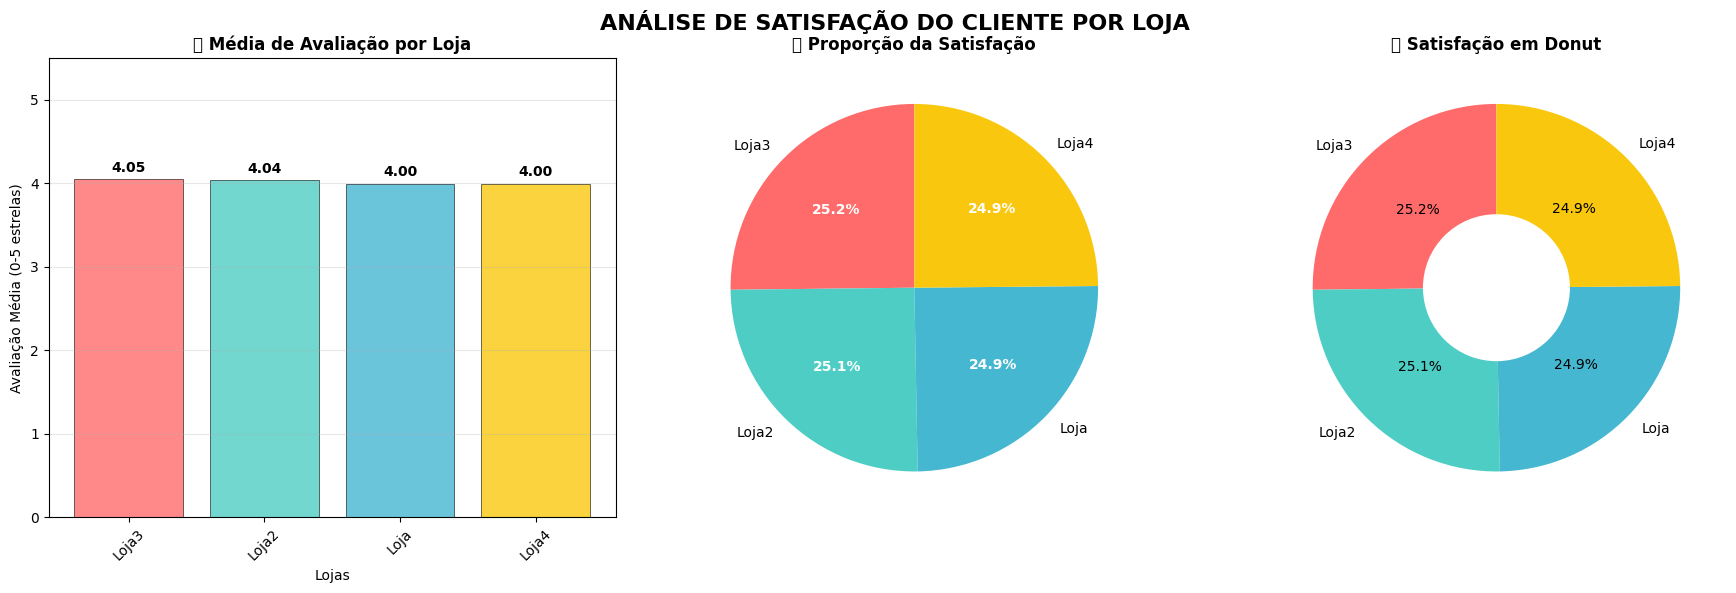


RELATÓRIO FINAL - AVALIAÇÕES POR LOJA
🏪 Loja3: 4.05 estrelas (2359 avaliações)
🏪 Loja2: 4.04 estrelas (2359 avaliações)
🏪 Loja: 4.00 estrelas (2358 avaliações)
🏪 Loja4: 4.00 estrelas (2358 avaliações)

📈 Melhor avaliação: 4.05 estrelas
📉 Pior avaliação: 4.00 estrelas
📊 Diferença: 0.05 estrelas

BÔNUS: CORRELAÇÃO ENTRE FRETE E AVALIAÇÃO


/tmp/ipython-input-619709077.py:144: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


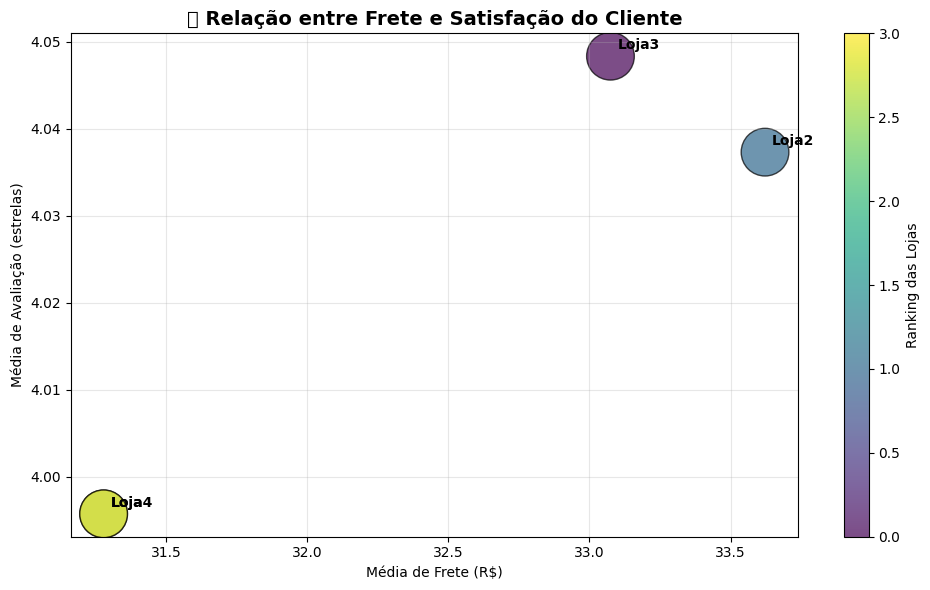

In [58]:
#
loja = loja4
# Dicionário com bases corrigidas
bases = {
    "Loja": loja,        # AGORA CORRIGIDO
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4
}

# VERIFICAÇÃO FINAL
print("🔍 VERIFICAÇÃO FINAL DAS BASES:")
print("-" * 40)
for nome, df in bases.items():
    if isinstance(df, pd.DataFrame) and not df.empty:
        print(f"✅ {nome}: DataFrame válido ({len(df)} registros)")
    else:
        print(f"❌ {nome}: Inválido ou vazio")

print("-" * 40)

# 1. CALCULAR MÉDIAS DE AVALIAÇÃO PARA CADA LOJA
resultados_avaliacao = []
for nome_loja, df in bases.items():
    try:
        if not df.empty and 'Avaliação da compra' in df.columns:
            # Converte para numérico se necessário
            df['Avaliação da compra'] = pd.to_numeric(df['Avaliação da compra'], errors='coerce')
            media_avaliacao = df['Avaliação da compra'].mean()
            total_avaliacoes = df['Avaliação da compra'].count()

            resultados_avaliacao.append({
                "Loja": nome_loja,
                "Média de Avaliação": media_avaliacao,
                "Total de Avaliações": total_avaliacoes
            })
            print(f"✅ {nome_loja}: {media_avaliacao:.2f} estrelas ({total_avaliacoes} avaliações)")
        else:
            print(f"⚠️  {nome_loja}: Coluna 'Avaliação da compra' não encontrada")
    except Exception as e:
        print(f"💥 Erro em {nome_loja}: {str(e)}")

# Criar DataFrame com resultados
if resultados_avaliacao:
    resultado_avaliacao_final = pd.DataFrame(resultados_avaliacao)
    resultado_avaliacao_final = resultado_avaliacao_final.sort_values(by='Média de Avaliação', ascending=False)

    # 2. CRIAR OS 3 GRÁFICOS DE AVALIAÇÃO
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('ANÁLISE DE SATISFAÇÃO DO CLIENTE POR LOJA', fontsize=16, fontweight='bold', y=0.98)

    cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']

    # --- GRÁFICO 1: BARRAS VERTICAIS ---
    bars = ax1.bar(resultado_avaliacao_final['Loja'],
                   resultado_avaliacao_final['Média de Avaliação'],
                   color=cores[:len(resultado_avaliacao_final)],
                   alpha=0.8, edgecolor='black', linewidth=0.5)
    ax1.set_title('⭐ Média de Avaliação por Loja', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Avaliação Média (0-5 estrelas)')
    ax1.set_xlabel('Lojas')
    ax1.set_ylim(0, 5.5)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    # Adiciona valores nas barras
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

    # --- GRÁFICO 2: GRÁFICO DE PIZZA ---
    wedges, texts, autotexts = ax2.pie(resultado_avaliacao_final['Média de Avaliação'],
                                      labels=resultado_avaliacao_final['Loja'],
                                      autopct='%1.1f%%',
                                      colors=cores[:len(resultado_avaliacao_final)],
                                      startangle=90)
    ax2.set_title('📊 Proporção da Satisfação', fontsize=12, fontweight='bold')

    # Melhora a legibilidade
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # --- GRÁFICO 3: GRÁFICO DE ROSCA (DONUT) ---
    wedges, texts, autotexts = ax3.pie(resultado_avaliacao_final['Média de Avaliação'],
                                      labels=resultado_avaliacao_final['Loja'],
                                      colors=cores[:len(resultado_avaliacao_final)],
                                      autopct=lambda p: f'{p:.1f}%',
                                      startangle=90,
                                      wedgeprops={'width': 0.6})
    ax3.set_title('🍩 Satisfação em Donut', fontsize=12, fontweight='bold')

    # Ajustes finais
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

    # 3. RELATÓRIO COMPLETO
    print("\n" + "="*50)
    print("RELATÓRIO FINAL - AVALIAÇÕES POR LOJA")
    print("="*50)
    for i, row in resultado_avaliacao_final.iterrows():
        print(f"🏪 {row['Loja']}: {row['Média de Avaliação']:.2f} estrelas ({row['Total de Avaliações']} avaliações)")

    print(f"\n📈 Melhor avaliação: {resultado_avaliacao_final['Média de Avaliação'].max():.2f} estrelas")
    print(f"📉 Pior avaliação: {resultado_avaliacao_final['Média de Avaliação'].min():.2f} estrelas")
    print(f"📊 Diferença: {resultado_avaliacao_final['Média de Avaliação'].max() - resultado_avaliacao_final['Média de Avaliação'].min():.2f} estrelas")

else:
    print("❌ Nenhum dado de avaliação encontrado para gerar gráficos")

# 4. GRÁFICO BÔNUS: COMPARAÇÃO ENTRE FRETE E AVALIAÇÃO
if resultados_avaliacao and 'medias_frete' in locals():
    print("\n" + "="*50)
    print("BÔNUS: CORRELAÇÃO ENTRE FRETE E AVALIAÇÃO")
    print("="*50)

    # Combinar dados de frete e avaliação
    comparativo = resultado_avaliacao_final.merge(df_medias_valido, on='Loja')

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(comparativo['Média_Frete'],
                         comparativo['Média de Avaliação'],
                         s=comparativo['Total de Avaliações']*0.5,
                         c=range(len(comparativo)),
                         cmap='viridis',
                         alpha=0.7,
                         edgecolors='black')

    plt.title('📊 Relação entre Frete e Satisfação do Cliente', fontsize=14, fontweight='bold')
    plt.xlabel('Média de Frete (R$)')
    plt.ylabel('Média de Avaliação (estrelas)')
    plt.grid(True, alpha=0.3)

    # Adicionar labels
    for i, row in comparativo.iterrows():
        plt.annotate(row['Loja'],
                    (row['Média_Frete'], row['Média de Avaliação']),
                    xytext=(5, 5), textcoords='offset points',
                    fontweight='bold')

    plt.colorbar(scatter, label='Ranking das Lojas')
    plt.tight_layout()
    plt.show()

# 4. Produtos Mais e Menos Vendidos

In [49]:
#
resultados_produtos = {}

for nome_loja, df in bases.items():
    try:
        # Verifica se é um DataFrame e se tem a coluna 'Produto'
        if isinstance(df, pd.DataFrame):
            if 'Produto' in df.columns:
                vendas_por_produto = df['Produto'].value_counts().reset_index()
                vendas_por_produto.columns = ['Produto', 'Quantidade Vendida']

                top_5 = vendas_por_produto.head(5)
                bottom_5 = vendas_por_produto.tail(5)

                resultados_produtos[nome_loja] = {
                    '5 Mais Vendidos': top_5,
                    '5 Menos Vendidos': bottom_5
                }
            else:
                print(f"Coluna 'Produto' não encontrada em {nome_loja}. Colunas disponíveis:", df.columns.tolist())
        else:
            print(f"{nome_loja} não é um DataFrame. Tipo encontrado:", type(df))

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {str(e)}")

# 3. EXIBIÇÃO DOS RESULTADOS
if resultados_produtos:
    print("\n RESULTADOS FINAIS:")
    for loja, dados in resultados_produtos.items():
        print(f"\n {loja}")
        print("\n 5 Mais Vendidos:")
        print(dados['5 Mais Vendidos'].to_string(index=False))
        print("\n 5 Menos Vendidos:")
        print(dados['5 Menos Vendidos'].to_string(index=False))
else:
    print("Nenhum resultado foi gerado. Verifique os erros acima.")

Loja não é um DataFrame. Tipo encontrado: <class 'str'>

 RESULTADOS FINAIS:

 Loja2

 5 Mais Vendidos:
                 Produto  Quantidade Vendida
Iniciando em programação                  65
             Micro-ondas                  62
                 Bateria                  61
                  Violão                  58
                Pandeiro                  58

 5 Menos Vendidos:
          Produto  Quantidade Vendida
   Fone de ouvido                  37
         Poltrona                  35
   Mesa de jantar                  34
       Impressora                  34
Jogo de tabuleiro                  32

 Loja3

 5 Mais Vendidos:
        Produto  Quantidade Vendida
  Kit banquetas                  57
 Mesa de jantar                  56
      Cama king                  56
Jogo de panelas                  55
         Cômoda                  55

 5 Menos Vendidos:
         Produto  Quantidade Vendida
        Guitarra                  38
   Jogo de copos                  36
    

# 5. Frete Médio por Loja


🔍 VERIFICAÇÃO FINAL DAS BASES:
----------------------------------------
✅ Loja: DataFrame válido (2358 registros)
✅ Loja2: DataFrame válido (2359 registros)
✅ Loja3: DataFrame válido (2359 registros)
✅ Loja4: DataFrame válido (2358 registros)
----------------------------------------
✅ Loja: R$ 31.28
✅ Loja2: R$ 33.62
✅ Loja3: R$ 33.07
✅ Loja4: R$ 31.28


/tmp/ipython-input-669960066.py:85: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-669960066.py:85: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-669960066.py:85: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


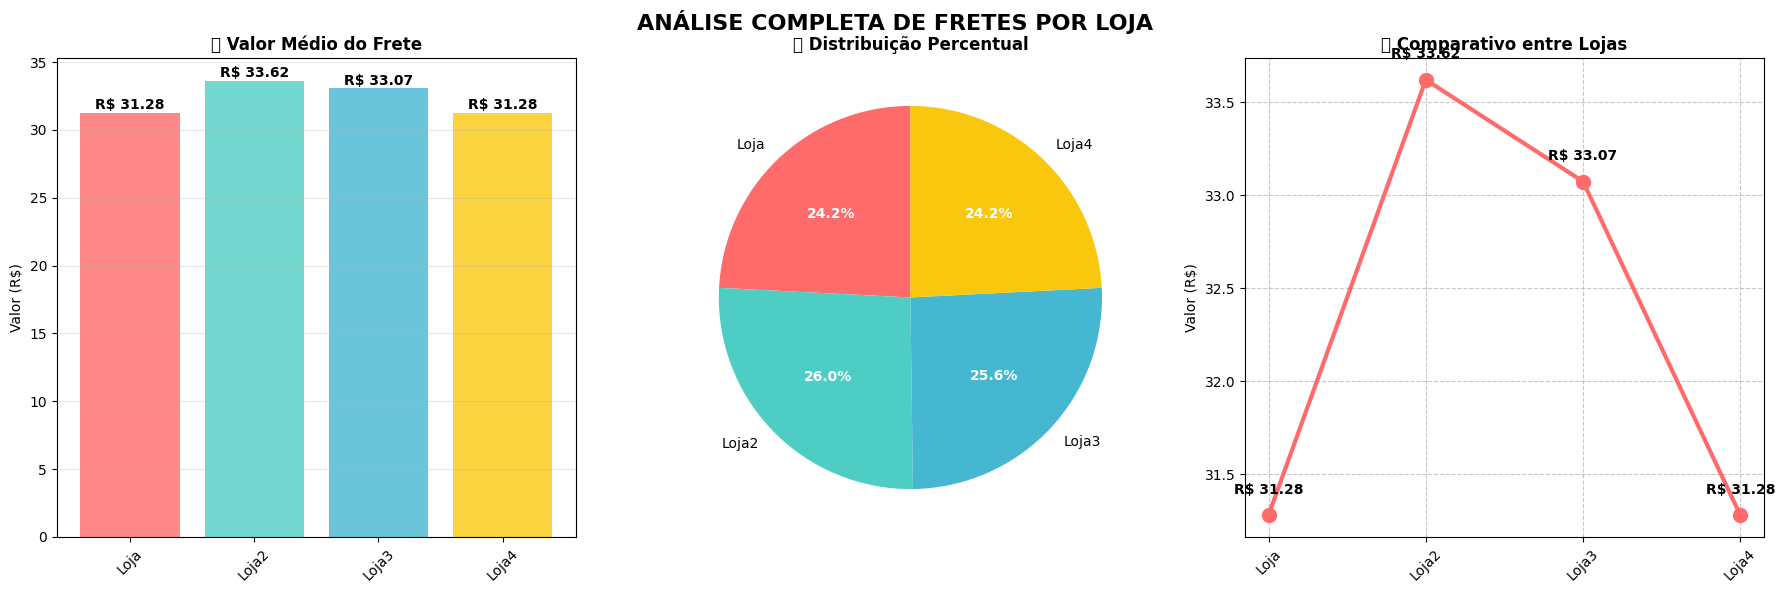


RELATÓRIO FINAL - MÉDIAS DE FRETE
🏪 Loja: R$ 31.28
🏪 Loja2: R$ 33.62
🏪 Loja3: R$ 33.07
🏪 Loja4: R$ 31.28

📊 Maior frete: R$ 33.62
📊 Menor frete: R$ 31.28
📈 Diferença: R$ 2.34


In [55]:
# CORREÇÃO DA VARIÁVEL loja (SUBSTITUA PELA SUA CORREÇÃO)
loja = loja4  # EXEMPLO - AJUSTE CONFORME SUA NECESSIDADE

# Dicionário com bases corrigidas
bases = {
    "Loja": loja,        # AGORA CORRIGIDO
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4
}

# VERIFICAÇÃO FINAL
print("🔍 VERIFICAÇÃO FINAL DAS BASES:")
print("-" * 40)
for nome, df in bases.items():
    if isinstance(df, pd.DataFrame) and not df.empty:
        print(f"✅ {nome}: DataFrame válido ({len(df)} registros)")
    else:
        print(f"❌ {nome}: Inválido ou vazio")

print("-" * 40)

# 1. CALCULAR MÉDIAS DE FRETE PARA CADA LOJA
medias_frete = {}
for nome_loja, df in bases.items():
    try:
        if not df.empty and 'Frete' in df.columns:
            df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
            media = df['Frete'].mean()
            medias_frete[nome_loja] = media
            print(f"✅ {nome_loja}: R$ {media:.2f}")
        else:
            medias_frete[nome_loja] = 0
    except Exception as e:
        print(f"💥 Erro em {nome_loja}: {str(e)}")
        medias_frete[nome_loja] = 0

# Converter para DataFrame
df_medias = pd.DataFrame(list(medias_frete.items()), columns=['Loja', 'Média_Frete'])
df_medias_valido = df_medias[df_medias['Média_Frete'] > 0]

# 2. CRIAR OS 3 GRÁFICOS
if len(df_medias_valido) > 0:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('ANÁLISE COMPLETA DE FRETES POR LOJA', fontsize=16, fontweight='bold', y=0.98)

    # Gráfico 1: BARRAS
    cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']
    bars = ax1.bar(df_medias_valido['Loja'], df_medias_valido['Média_Frete'],
                   color=cores[:len(df_medias_valido)], alpha=0.8)
    ax1.set_title('📦 Valor Médio do Frete', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Valor (R$)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'R$ {height:.2f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 2: PIZZA
    wedges, texts, autotexts = ax2.pie(df_medias_valido['Média_Frete'],
                                      labels=df_medias_valido['Loja'],
                                      autopct='%1.1f%%',
                                      colors=cores[:len(df_medias_valido)],
                                      startangle=90)
    ax2.set_title('🥧 Distribuição Percentual', fontsize=12, fontweight='bold')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # Gráfico 3: LINHAS
    ax3.plot(df_medias_valido['Loja'], df_medias_valido['Média_Frete'],
             marker='o', linewidth=3, markersize=10, color='#FF6B6B')
    ax3.set_title('📈 Comparativo entre Lojas', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Valor (R$)')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, linestyle='--', alpha=0.7)

    for i, valor in enumerate(df_medias_valido['Média_Frete']):
        ax3.text(i, valor + 0.1, f'R$ {valor:.2f}',
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

    # 3. RELATÓRIO FINAL
    print("\n" + "="*50)
    print("RELATÓRIO FINAL - MÉDIAS DE FRETE")
    print("="*50)
    for i, row in df_medias_valido.iterrows():
        print(f"🏪 {row['Loja']}: R$ {row['Média_Frete']:.2f}")

    print(f"\n📊 Maior frete: R$ {df_medias_valido['Média_Frete'].max():.2f}")
    print(f"📊 Menor frete: R$ {df_medias_valido['Média_Frete'].min():.2f}")
    print(f"📈 Diferença: R$ {df_medias_valido['Média_Frete'].max() - df_medias_valido['Média_Frete'].min():.2f}")

else:
    print("❌ Nenhum dado válido para gerar gráficos")

# Relatório